# Naïve Bayes Classifier

*Naïve Bayes* (or NB) is a classification technique based on *Bayes' Rule*. The critical assumption in applying *Naïve Bayes* classification is that **all features that predicts target values are independent of each other**. NB models produce good results when used for textual data analysis such as Natural Language Processing.

Naïve Bayes classifier predicts class membership probabilities for a given data point. This is also known as **Maximum A-Posteriori (MAP)**.

Assume that we want to estimate an unobserved population parameter $\theta$ on the basis of continuous observations $X = \{ x_i \}$. Let $P$ be the *probability density function* of $X$, so that $P(x|\theta)$ is the probability of $x$ estimated using parameters $\theta$. The **Maximum Likelhood Estimate** or (MLE) is defined as:

$$
\underset{MLE}{\hat{\theta}}(x) = \underset{\theta}{\textrm{argmin}} \: P(x|\theta)
$$

Assume a prior distribution $g$ over $\theta$. The posterior distribution over $\theta$ is defined as:

$$
\theta \rightarrow P(\theta | x) = \dfrac{P(x|\theta) P(\theta)}{\int_{\theta} P(x | r) P(r) dr}
$$

The **Maximum A Posteriori Estimate** (or MAP) is defined as:

$$
\begin{align*}
\underset{MAP}{\hat{\theta}}(x) &= \underset{\theta}{\textrm{argmax}} P(\theta | x) \\
&= \underset{\theta}{\textrm{argmax}} \dfrac{P(x|\theta) P(\theta)}{\int_{\theta} P(x | r) P(r) dr}
\end{align*}
$$

## Gaussian Naïve Bayes

When we have continuous attribute values, we made an assumption that the values associated with each class are distributed according to Gaussian or Normal distribution. For example, suppose the training data contains a continuous attribute x. We first segment the data by the class, and then compute the mean and variance of $x$ in each class. Let $\mu_i$ be the mean of the values and let $\sigma_i$ be the variance of the values associated with the $i^{th}$ class. Suppose we have some observation value $x_i$, then the probability distribution function for a given class $C_j$ can be written as:

<font size="3">
$$
P(x_i | C_j) = \dfrac{1}{\sqrt{2\pi} \sigma_j} e^{-\frac{\left(x_i - \mu_j \right)^2}{2\underset{j}{\sigma^2}}}
$$

</font>

## Applications of Naïve Bayes

Naïve Bayes is very well suited for large volumes of data. It can be applied in many domains such as:

1. Spam filtering
2. Text Classification
3. Sentiment Analysis
4. Recommender Systems

For today's demo, I will be using the [Adult dataset](https://www.kaggle.com/qizarafzaal/adult-dataset) from Kaggle. This dataset is used to predict whether income exceeds \$50k/yr based on census data.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid", palette="icefire")

# Seaborn generates a lot of warnings. Disable them.
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data.
df = pd.read_csv("../data/adult.csv", sep=',\s')

In [3]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
# Rename the columns.
col_names = ['Age', 'Workclass', 'ID', 'Education', 'Education_num', 'Marital_status', 'Occupation', 'Relationship',
             'Race', 'Gender', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Country', 'Income']

df.columns = col_names

In [5]:
# View summary.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
Age               32560 non-null int64
Workclass         32560 non-null object
ID                32560 non-null int64
Education         32560 non-null object
Education_num     32560 non-null int64
Marital_status    32560 non-null object
Occupation        32560 non-null object
Relationship      32560 non-null object
Race              32560 non-null object
Gender            32560 non-null object
Capital_gain      32560 non-null int64
Capital_loss      32560 non-null int64
Hours_per_week    32560 non-null int64
Country           32560 non-null object
Income            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


First, let us segregate categorical and numerical variables.

In [6]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print(categorical,)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Gender', 'Country', 'Income']


### Explore categorical variables

In [7]:
# Check for missing values.
df[categorical].isnull().sum()

Workclass         0
Education         0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Country           0
Income            0
dtype: int64

No missing values. Great !! Or is it ?? Let us count frequencies for each categorical attribute.

In [8]:
for var in categorical:
    print(var,'\n-------------------------\n')
    print(df[var].value_counts())

Workclass 
-------------------------

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64
Education 
-------------------------

HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: Education, dtype: int64
Marital_status 
-------------------------

Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Marital_stat

We can see the *missing* values are encoded as **?** strings. So, we have to replace these with `NaN` so that pandas can detect and remove them.

In [9]:
for cat in categorical:
    df[cat].replace('?', np.NaN, inplace=True)

In [10]:
# Let's check frequency count for 'Workclass'
df['Workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

**?** values have been removed. Let's again compute the number of missing values.

In [11]:
df[categorical].isnull().sum()

Workclass         1836
Education            0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Gender               0
Country            583
Income               0
dtype: int64

### Explore Numerical variables

In [12]:
numerical = [var for var in df.columns if df[var].dtype != 'O']

print(numerical,)

['Age', 'ID', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [13]:
df[numerical].isnull().sum()

Age               0
ID                0
Education_num     0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
dtype: int64

No missing values.

### Generate observed and target variables

In [14]:
X = df.drop(['Income'], axis=1)
Y = df['Income']
print(f'Number of training samples is {len(X)}.')

Number of training samples is 32560.


Split data into training and test sets.

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42) # random_state for reproducibility.

In [16]:
X_train.shape, X_test.shape

((22792, 14), (9768, 14))

### Generate Feature Vector

**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power.

In [17]:
# percentage of missing values in categorical variables.

categorical = [var for var in X_train.columns if X_train[var].dtype == 'O']
X_train[categorical].isnull().mean()

Workclass         0.057432
Education         0.000000
Marital_status    0.000000
Occupation        0.057696
Relationship      0.000000
Race              0.000000
Gender            0.000000
Country           0.017331
dtype: float64

Impute the three missing categorical variables with most frequently occurring values.

In [18]:
for tdf in [X_train, X_test]:
    tdf['Workclass'].fillna(tdf['Workclass'].mode()[0], inplace=True)
    tdf['Occupation'].fillna(tdf['Occupation'].mode()[0], inplace=True)
    tdf['Country'].fillna(tdf['Country'].mode()[0], inplace=True)

In [19]:
X_train.shape, X_test.shape

((22792, 14), (9768, 14))

In [20]:
# Check again.
X_train[categorical].isnull().mean()

Workclass         0.0
Education         0.0
Marital_status    0.0
Occupation        0.0
Relationship      0.0
Race              0.0
Gender            0.0
Country           0.0
dtype: float64

In [21]:
# Check missing values in complete X_train

X_train.isnull().sum()

Age               0
Workclass         0
ID                0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Country           0
dtype: int64

Sweet !! Let us now encode categorical variables.

In [22]:
X_train[categorical].head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Gender,Country
21385,Private,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Male,United-States
19749,Private,HS-grad,Never-married,Craft-repair,Own-child,Asian-Pac-Islander,Male,Vietnam
1216,Private,HS-grad,Divorced,Exec-managerial,Not-in-family,Asian-Pac-Islander,Female,China
30048,Federal-gov,Masters,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23077,Private,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States


One-hot encode categorical variables.

In [23]:
import category_encoders as ce

In [24]:
encoder = ce.OneHotEncoder(cols=categorical)

<div class="alert alert-block alert-success">
<b> EXCERCISE </b>
    
<ul> <li> Do the same encoding operation using <span style="color:red">sklearn.preprocessing.OneHotEncoder</span> module.</li> </ul>
</div>

In [25]:
X_train = encoder.fit_transform(X_train) # train+fit model on X_train

X_test = encoder.transform(X_test) # fit model on X_test

In [26]:
X_train.shape, X_test.shape

((22792, 105), (9768, 105))

Now all the columns are numerical and we are ready to build a model on this data. Before that, however, we need to map all the feature variables onto the same scale.

### Feature Scaling

In [27]:
from sklearn.preprocessing import RobustScaler

In [28]:
scaler = RobustScaler()

In [29]:
# Gather column names for conversion from numpy to pandas later.
train_cols = X_train.columns

X_train.shape, X_test.shape

((22792, 105), (9768, 105))

In [30]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [31]:
X_train.shape, X_test.shape

((22792, 105), (9768, 105))

In [32]:
# Convert X_train and X_test back to dataframes.
X_train = pd.DataFrame(X_train, columns=[train_cols])

X_test = pd.DataFrame(X_test, columns=[train_cols])

In [33]:
type(X_train), type(X_test)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [34]:
X_train.head()

,Age,Workclass_1,Workclass_2,Workclass_3,Workclass_4,Workclass_5,Workclass_6,Workclass_7,Workclass_8,ID,...,Country_32,Country_33,Country_34,Country_35,Country_36,Country_37,Country_38,Country_39,Country_40,Country_41
0,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.649359,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.886948,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.130124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.95,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.131533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
X_test.head()

,Age,Workclass_1,Workclass_2,Workclass_3,Workclass_4,Workclass_5,Workclass_6,Workclass_7,Workclass_8,ID,...,Country_32,Country_33,Country_34,Country_35,Country_36,Country_37,Country_38,Country_39,Country_40,Country_41
0,0.051948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.193259,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.415584,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.065147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.415584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.727273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.068370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.467532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.451461,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train a Gaussian Naïve Bayes Classifier

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
trainer = GaussianNB()

In [38]:
trainer.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [40]:
y_pred = trainer.predict(X_test)
y_pred

array(['<=50K', '>50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
      dtype='<U5')

### Check accuracy score

In [41]:
from sklearn.metrics import accuracy_score

In [46]:
print(f'Test accuracy: {accuracy_score(y_test, y_pred)}')

Test accuracy: 0.7956592956592956


Here, **y_test** are the target values and **y_pred** are the predicted values.

Check training accuracy for signs of over-fitting.

In [45]:
y_pred_train = trainer.predict(X_train)

print(f'Train accuracy: {accuracy_score(y_train, y_pred_train)}')

Train accuracy: 0.7954545454545454


Train and Test set accuracies are almost similar. So, there is no sign of over/under fitting.

To ascertain that the model is performing well, a way is to validate it against the **null accuracy**. A *null accuracy* occurs when the model always predicts the most frequent class.

We should compare predicted and null accuracies always on the **test set**.

In [53]:
y_test.value_counts()

<=50K    7395
>50K     2373
Name: Income, dtype: int64

In [54]:
print(f'Null accuracy: {y_test.value_counts()[0] / (y_test.value_counts().sum())}')

Null accuracy: 0.7570638820638821


Since test accuracy exceeds the null accuracy, it seems Gaussian Naive Bayes is doing a pretty decent job of classification.

### Confusion Matrix

A *confusion matrix* gives a summary of correct and incorrect predictions by a model for every class. Outcomes from a confusion matrix are metrics like: **True Positive (TP), False Positive (FP), False Positive (FP) and False Negative (FN)**.

In [56]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[5826, 1569],
       [ 427, 1946]], dtype=int64)

You can visualize a *confusion matrix* using `seaborn.heatmap` function.

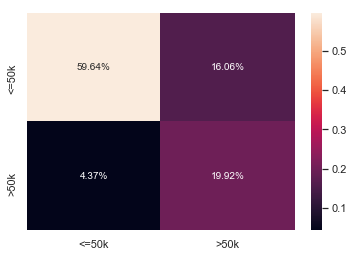

In [61]:
sns.heatmap(cm/np.sum(cm), fmt='.2%', xticklabels=['<=50k','>50k'], yticklabels=['<=50k','>50k'], annot=True)